# Investigate a Dataset: An analysis of the The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***
<a id='intro'></a>
## Introduction

I have chosen to use the TMDb data set to answer a series of questions pertaining to the movie industry. This data originated from <a href="https://www.kaggle.com/juzershakir/tmdb-movies-dataset">Kaggle</a> but has since been cleaned by  Udacity. This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

Questions that I will attempt to answer in this analysis:
1. Which movies had the highest and which had the lowest profits?
2. Who are the directors that are producing the most profits in the movie industry?
3. Which actors appeared in the most movies?
4. Which movies had the longest runtimes and which had the shortest runtimes?
5. Average runtimes and the impact on movie profits

In [1]:
#Importing all of the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
%matplotlib inline

***
<a id='wrangling'></a>
## Data Wrangling

This set has been organized into 21 columns: <b>id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj</b>. Several of these columns will not be necessary during the analysis and an explanation will be provided for removing the unnecessary columns.

### General Properties

In [2]:
#Creating a new series called tmdb_dataset containing all of the csv data
tmdb_dataset = pd.read_csv('tmdb-movies.csv')

#The first five rows of the data
tmdb_dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After initially reviewing the data, a couple of items stand out:
1. Vote count, vote average and popularity won't be valuable for this analysis as they are different for all movies and subjective.
2. An assumption that all currency is USD (United States Dollar). It would be nice if the data stated what currency was used so we'll assume it's USD as well.
3. Several items contain zeroes and/or numbers that are not reasonable. Example: The budget for Karate Kid, Part II given in the csv file is 113 dollars. According to <a href="https://en.wikipedia.org/wiki/The_Karate_Kid_Part_II">Wikipedia</a>, the budget is \\$13 million dollars, which is a very big discrepancy. There are 5755 records that have a budget below \\$750 dollars. We will have to figure out how to remedy these incorrect budgets and zeroed-out budgets during our data cleaning phase.

***
### Data Cleaning - What data is extraneous, what data is missing and how are we going to fix it?


Several columns will need to be dropped as they are not needed and/or hold no value in this analysis:
<b>id, imdb_id, popularity, homepage, tagline, keywords, overview, vote_count, vote_average</b>

Once these columns are dropped, we are left with 13 columns:
<b>budget, revenue, original_title, cast, director, runtime, genres, production_companies, release_date, release_year, budget_adj, revenue_adj</b>

In [3]:
#Let's drop those now
drop_columns = ['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average']
tmdb_dataset= tmdb_dataset.drop(drop_columns, 1)

In [4]:
#Now we can see the remaining columns
tmdb_dataset.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


In [5]:
#Then we will need to find and remove any duplicate rows.
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1018.8+ KB


In [6]:
#We have 10866 rows of data (1 row is the header row). Now to drop the duplicates.
tmdb_dataset.drop_duplicates(keep ='first', inplace=True)

In [7]:
#Now let's see how many rows were deleted for being duplicates.
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10865 non-null  int64  
 1   revenue               10865 non-null  int64  
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   release_date          10865 non-null  object 
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


It looks like we only had 1 duplicate value so that has been removed. We have 10865 rows including the header row now.

In [8]:
#We will also need to find null values and decide how we want to fill that data (0, NaN, mean, etc.)
tmdb_dataset.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

So cast, director, genres, and production companies contain null values. Let's drop those values and then move onto filling in some other important data.

In [9]:
drop_na_values = ['cast', 'director', 'genres', 'production_companies']
tmdb_dataset.dropna(subset = drop_na_values, how = 'any', inplace = True)

In [10]:
#Here we can see there are no more null values
tmdb_dataset.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
#And we now have 9772 records, down from 10865.
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9772 non-null   int64  
 1   revenue               9772 non-null   int64  
 2   original_title        9772 non-null   object 
 3   cast                  9772 non-null   object 
 4   director              9772 non-null   object 
 5   runtime               9772 non-null   int64  
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   release_date          9772 non-null   object 
 9   release_year          9772 non-null   int64  
 10  budget_adj            9772 non-null   float64
 11  revenue_adj           9772 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 992.5+ KB


In [12]:
#Let's take a peek at the budget and revenue columns to decide what to do with all of those zeroes.
#How many zeroes are in the budget column?
zero_count_budget = tmdb_dataset['budget'].isin([0]).sum()
print('The budget column contains ' + str(zero_count_budget) + ' zeroes.')

The budget column contains 4751 zeroes.


In [13]:
#How many zeroes are in the revenue column?
zero_count_revenue = tmdb_dataset['revenue'].isin([0]).sum()
print('The revenue column contains ' + str(zero_count_revenue) + ' zeroes.')

The revenue column contains 5022 zeroes.


We have options to handle all those zeroes and both come with their own problems to solve:
1. Convert all of the zeroes to NaN. <b>This will remove a substantial number of movies from the dataset</b></li>
2. Fill all of the zeroes with the mean of the overall budget or revenue column. <b>This option will affect the entire dataset analysis overall as over half of the movies will contain the exact same budget and revenue.</b></li>

My vote is for option 1. Although we will lose some of the movies, at least the data of those remaining will be more accurate.

In [14]:
#This will take all of the zeroes in the budget and revenue columns and convert them to NaN (Not a Number)
zeroes_to_NaN = ['budget', 'revenue']
tmdb_dataset[zeroes_to_NaN] = tmdb_dataset[zeroes_to_NaN].replace(0, np.NAN)

In [15]:
#Now about half of budget and revenues are null values.
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5021 non-null   float64
 1   revenue               4750 non-null   float64
 2   original_title        9772 non-null   object 
 3   cast                  9772 non-null   object 
 4   director              9772 non-null   object 
 5   runtime               9772 non-null   int64  
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   release_date          9772 non-null   object 
 9   release_year          9772 non-null   int64  
 10  budget_adj            9772 non-null   float64
 11  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 992.5+ KB


In [16]:
#Now that budget and revenue contains nulls, we can drop those null values and work with the remaining data.
tmdb_dataset.dropna(subset = zeroes_to_NaN, inplace = True)

In [17]:
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3805 non-null   float64
 1   revenue               3805 non-null   float64
 2   original_title        3805 non-null   object 
 3   cast                  3805 non-null   object 
 4   director              3805 non-null   object 
 5   runtime               3805 non-null   int64  
 6   genres                3805 non-null   object 
 7   production_companies  3805 non-null   object 
 8   release_date          3805 non-null   object 
 9   release_year          3805 non-null   int64  
 10  budget_adj            3805 non-null   float64
 11  revenue_adj           3805 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 386.4+ KB


After wrangling our data, we are left with 3805 movies (including the header). We will use this 'clean' data to answer our initial questions.

***
<a id='eda'></a>
## Exploratory Data Analysis - Answering our questions about the TMDb dataset


#### 1. Which movies had the highest and the lowest profits?

In [18]:
#I am going to insert a new column into the dataframe for total_profits. This will allow us to sort by min and max to answer
#our first question
#How to calculate profit (budget - revenue)
tmdb_dataset.insert(2,'total_profit',tmdb_dataset['revenue']-tmdb_dataset['budget'])

In [19]:
#Here is a look at the new column 'total_profit' inserted into the 3rd column
tmdb_dataset.head(2)

,budget,revenue,total_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08


In [20]:
highest_profit = tmdb_dataset.loc[tmdb_dataset['total_profit'].idxmax()]
highest_profit

budget                                                           2.37e+08
revenue                                                       2.78151e+09
total_profit                                                  2.54451e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                                     12/10/09
release_year                                                         2009
budget_adj                                                    2.40887e+08
revenue_adj                                                   2.82712e+09
Name: 1386, dtype: object

In [21]:
#And the lowest profit
lowest_profit = tmdb_dataset.loc[tmdb_dataset['total_profit'].idxmin()]
lowest_profit

budget                                                           4.25e+08
revenue                                                       1.10876e+07
total_profit                                                 -4.13912e+08
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                                      12/2/10
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                                                   1.10876e+07
Name: 2244, dtype: object

After seeing the **budget, budget_adj, revenue** and **revenue_adj** not being correctly formatted, I decided to convert the entire **budget, budget_adj, revenue** and **revenue_adj** column from float to integer

In [22]:
tmdb_dataset = tmdb_dataset.astype({"budget": np.int64, "revenue": np.int64, "budget_adj": np.int64, "revenue_adj":np.int64, "total_profit":np.int64})

In [23]:
#budget and revenue have been converted to integers so let's see our highest budgets now
highest_profit = tmdb_dataset.loc[tmdb_dataset['total_profit'].idxmax()]
highest_profit
#That looks better!

budget                                                          237000000
revenue                                                        2781505847
total_profit                                                   2544505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                                     12/10/09
release_year                                                         2009
budget_adj                                                      240886902
revenue_adj                                                    2827123750
Name: 1386, dtype: object

In [24]:
#And the updated lowest profit
lowest_profit = tmdb_dataset.loc[tmdb_dataset['total_profit'].idxmin()]
lowest_profit

budget                                                          425000000
revenue                                                          11087569
total_profit                                                   -413912431
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                                      12/2/10
release_year                                                         2010
budget_adj                                                      425000000
revenue_adj                                                      11087569
Name: 2244, dtype: object

In [25]:
#With the pandas concat method we can show our results in a much more presentable fashion
profit_compare = pd.concat([highest_profit, lowest_profit], axis=1,  keys=['Highest Profit', 'Lowest Profit'])
profit_compare

,Highest Profit,Lowest Profit
budget,237000000,425000000
revenue,2781505847,11087569
total_profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,12/10/09,12/2/10


We can see that **Avatar takes the top spot** but it does cause me to wonder where The Warrior's Way fell in comparison to other large budgeted movies.

In [26]:
#We will display the top 3 budgets and see where it falls
tmdb_dataset.nlargest(3,'budget')

,budget,revenue,total_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
2244,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,2010,425000000,11087569
3375,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,2011,368371256,990417500
7387,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2007,315500574,1010653507


The Warrior's Way not only started with the largest budget of all of the movies in our data but also lost the most money. That's a real financial blow to the production company, Boram Entertainment Inc.

***

#### 2. Who are the directors that are producing the most profits in the movie industry?

In [27]:
#for this analysis, we'll create a new series that contains the director and total_profit columns
data_direct = tmdb_dataset[['director','total_profit']]

#Now we'll group all of the data by directors and sum up the total profit at the same time.
group_direct = data_direct.groupby(['director']).sum()

#And sort it by largest total profit so we can begin to answer our second question.
group_direct = group_direct.sort_values(by=['total_profit'], ascending=False)
group_direct.head(5)

,total_profit
director,
Steven Spielberg,7467063772
Peter Jackson,5197244659
James Cameron,5081994863
Michael Bay,3557208171
David Yates,3379295625


In [28]:
#We're really only concerned with the top 25 for this analysis
top_25_directors = group_direct.head(25)
top_25_directors

,total_profit
director,
Steven Spielberg,7467063772
Peter Jackson,5197244659
James Cameron,5081994863
Michael Bay,3557208171
David Yates,3379295625
Christopher Nolan,3162548502
Chris Columbus,3116631503
George Lucas,2955996893
Robert Zemeckis,2846690869


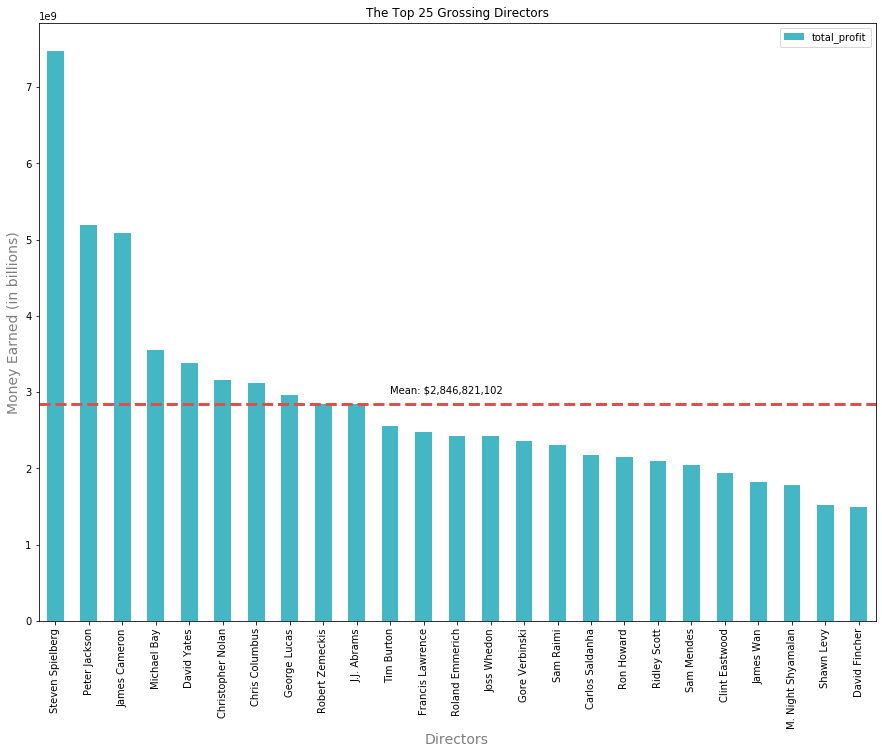

In [29]:
#Setting up the bar plot for our top 25 directors
dir_plt = top_25_directors.plot.bar(color = '#44B6C4', fontsize = 10)
#title
dir_plt.set(title = 'The Top 25 Grossing Directors')
#y-axis label
dir_plt.set_ylabel('Money Earned (in billions)', color = 'gray', fontsize = '14')
#x-axis label
dir_plt.set_xlabel('Directors', color = 'gray', fontsize = '14')
#plot size
dir_plt.figure.set_size_inches(15,11)

#Let's see the mean compared to the directors' profits
dir_mean = int(top_25_directors.mean())
plt.axhline(y=dir_mean, xmin=0, xmax=len(top_25_directors.index), color='#D8534D', linestyle='--', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(min_ylim+10, dir_mean*1.05, 'Mean: ${:,}'.format(dir_mean))
plt.show()

We have the answer to our second question now - **Steven Spielberg, Peter Jackson, James Cameron, Michael Bay and David Yates are the top grossing directors in the film industry today**. Overall Steven Spielberg has a commanding lead over the second place Peter Jackson.

***

#### 3. Which actors appeared in the most movies?

In [30]:
#The cast column is delimited by the | (pipe) symbol. We will need to separate them into a temporary dataframe so we can explore the data
split_cast = tmdb_dataset['cast'].str.cat(sep = '|')
split_cast = pd.Series(split_cast.split('|'))

#Count the actors
act_count = split_cast.value_counts(ascending = False)

#We're really only concerned with the top 25 for this analysis
top_25 = act_count.head(25)
top_25

Robert De Niro           52
Bruce Willis             46
Samuel L. Jackson        44
Nicolas Cage             43
Matt Damon               36
Johnny Depp              35
Tom Hanks                34
Sylvester Stallone       34
Morgan Freeman           34
Brad Pitt                34
Harrison Ford            34
Tom Cruise               33
Denzel Washington        32
Eddie Murphy             32
Liam Neeson              31
Owen Wilson              30
Julianne Moore           30
Gene Hackman             29
Mark Wahlberg            29
Robin Williams           29
Arnold Schwarzenegger    29
Willem Dafoe             29
Meryl Streep             29
Ewan McGregor            28
Keanu Reeves             28
dtype: int64

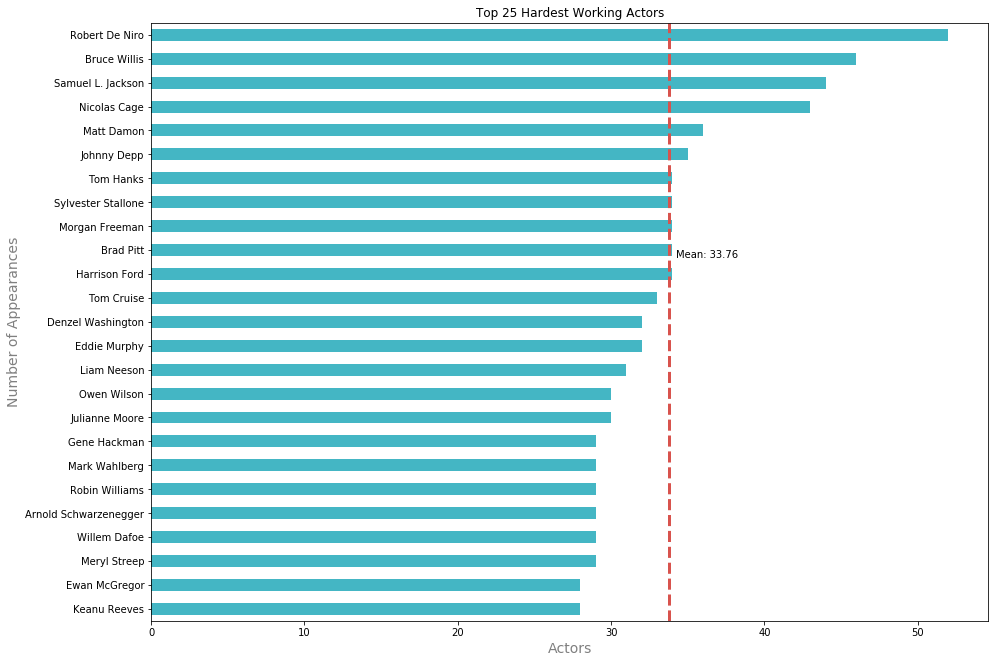

In [31]:
#Let's plot the top 50 appearances by actors in our data
#We'll sort the data from largest to smallest
top_25.sort_values(ascending = True, inplace = True)
#type of plot - horizontal bar
act_plt = top_25.plot.barh(color = '#44B6C4', fontsize = 10)
#title
act_plt.set(title = 'Top 25 Hardest Working Actors')
#x-axis label
act_plt.set_ylabel('Number of Appearances', color = 'gray', fontsize = '14')
#y-axis label
act_plt.set_xlabel('Actors', color = 'gray', fontsize = '14')
#plot size
act_plt.figure.set_size_inches(15,11)

#Let's see the mean compared to our actors
mean = top_25.mean()
plt.axvline(mean, color='#D8534D', linestyle='--', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.015, max_ylim*0.6, 'Mean: {:.2f}'.format(mean))
plt.show()

In [32]:
#Let's see some descriptive statistics about our actors appearances.
top_25.describe()

count    25.000000
mean     33.760000
std       6.206717
min      28.000000
25%      29.000000
50%      32.000000
75%      34.000000
max      52.000000
dtype: float64

#### Out of 6747 total actors, we selected the top 25 actors from our dataset. Each actor averages about 34 movie appearances. We can conclude from this breakdown that Robert De Niro's 52 appearances is quite the achievement over the years.

***
#### 4. Which movies had the longest and shortest runtimes and what affect did that have on a movie's profitability?

In [33]:
#We'll select three columns for this question - total_profit and runtime and original_title
runtimes= tmdb_dataset[['original_title', 'runtime', 'total_profit']]
runtimes.head()

,original_title,runtime,total_profit
0,Jurassic World,124,1363528810
1,Mad Max: Fury Road,120,228436354
2,Insurgent,119,185238201
3,Star Wars: The Force Awakens,136,1868178225
4,Furious 7,137,1316249360


In [34]:
runtimes = runtimes.sort_values(by=['runtime'], ascending=False)
runtimes

,original_title,runtime,total_profit
2107,Carlos,338,-17128721
10443,Cleopatra,248,26635000
7332,Heaven's Gate,219,-40515669
9850,Lawrence of Arabia,216,55000000
5065,Gods and Generals,214,-43076064
...,...,...,...
9462,The Land Before Time,69,72160846
7020,9 Songs,66,-667677
3424,Winnie the Pooh,63,-15540000
8005,Mickey's Christmas Carol,26,18000000


The answer to our fourth question has revealed itself.
The movie with the **longest runtime is The Lord of the Rings: The Return of the King at 201 minutes.**
The movie with the **shortest runtime is The Jungle Book coming in a 78 minutes.**
***
#### 5. What are the average movie runtimes and what impact does runtime have on total profits?

In [35]:
#To get started, we'll select those movies that made above $200,000,000 in total profit
runtimes = runtimes.loc[runtimes['total_profit'] >= 200000000]

#sort the new series by the runtime, from highest to lowest
runtimes = runtimes.sort_values(by=['runtime'], ascending=False)
runtimes

,original_title,runtime,total_profit
4949,The Lord of the Rings: The Return of the King,201,1024888979
10222,Schindler's List,195,299265768
5231,Titanic,194,1645034188
2414,The Green Mile,189,224600000
6215,King Kong,187,343000000
...,...,...,...
8068,Toy Story,81,331958736
2449,The Blair Witch Project,81,247975000
3913,Ice Age,81,324257136
10110,One Hundred and One Dalmatians,79,211880014


In [36]:
#We now have 396 movies that have at least a 78 minute run time and all have made over $200,000,000 in profits.
#The runtime mean can possibly give us some more insight into our search
rt_mean = int(round(runtimes['runtime'].mean()))
rt_mean

120

In [37]:
#Since we have the mean of 120 minutes now, let's find all of those movies above and below the mean.
rt_above_mean = runtimes.loc[runtimes['runtime'] >= rt_mean]
rt_below_mean = runtimes.loc[runtimes['runtime'] <= rt_mean]

#Resetting the indexes for each seires to make the comparison look better
rt_above_mean.reset_index(drop=True, inplace=True)
rt_below_mean.reset_index(drop=True, inplace=True)

#Using pd.concat to compare both runtime series side by side
rt_mean_compare = pd.concat([rt_above_mean, rt_below_mean], axis=1, keys=['Runtime Above Mean', 'Runtime Below Mean'])

#What does our comparison begin to show...?
rt_mean_compare.head(5)

Runtime Above Mean                        \
                                  original_title runtime  total_profit   
0  The Lord of the Rings: The Return of the King   201.0  1.024889e+09   
1                               Schindler's List   195.0  2.992658e+08   
2                                        Titanic   194.0  1.645034e+09   
3                                 The Green Mile   189.0  2.246000e+08   
4                                      King Kong   187.0  3.430000e+08   

               Runtime Below Mean                       
                   original_title runtime total_profit  
0                Mr. & Mrs. Smith     120    368207520  
1             Slumdog Millionaire     120    362910544  
2              Mad Max: Fury Road     120    228436354  
3  Home Alone 2: Lost In New York     120    340991681  
4              Planet of the Apes     119    262211740

In [38]:
#And now the total profit mean
tp_mean = int(round(runtimes['total_profit'].mean(),4))
tp_mean

414050408

In [39]:
#Total profits above the mean
tp_above_mean = runtimes.loc[runtimes['total_profit'] >= tp_mean]
#Total profits below the mean
tp_below_mean = runtimes.loc[runtimes['total_profit'] <= tp_mean]

#Reset the indexes to make the comparison look better
tp_above_mean.reset_index(drop=True, inplace=True)
tp_below_mean.reset_index(drop=True, inplace=True)

#Combining both new series using pd.concat
tp_mean_compare = pd.concat([tp_above_mean, tp_below_mean], axis=1,  keys=['Total Profits Above Mean', 'Total Profits Below Mean'])
tp_mean_compare.head(5)

Total Profits Above Mean                        \
                                      original_title runtime  total_profit   
0      The Lord of the Rings: The Return of the King   201.0  1.024889e+09   
1                                            Titanic   194.0  1.645034e+09   
2              The Lord of the Rings: The Two Towers   179.0  8.472874e+08   
3  The Lord of the Rings: The Fellowship of the Ring   178.0  7.783684e+08   
4           Pirates of the Caribbean: At World's End   169.0  6.610000e+08   

  Total Profits Below Mean                       
            original_title runtime total_profit  
0         Schindler's List     195    299265768  
1           The Green Mile     189    224600000  
2                King Kong     187    343000000  
3             Pearl Harbor     183    309220945  
4       Dances with Wolves     181    402208848

In [40]:
#We can now see what the total profit averages are for those above the runtime mean of 120 minutes and those below 120 minutes.
avg_above_rt = int(round(rt_above_mean['total_profit'].mean()))
avg_below_rt = int(round(rt_below_mean['total_profit'].mean()))
print('The average profit a movie makes that runs above ' + str(rt_mean) + ' minutes'+ ' is ' + '$' + str(avg_above_rt) + '.')
print('The average profit a movie makes that runs below ' + str(rt_mean) + ' minutes'+ ' is ' + '$' + str(avg_below_rt) + '.')

The average profit a movie makes that runs above 120 minutes is $477706188.
The average profit a movie makes that runs below 120 minutes is $356495074.


***
<a id='conclusions'></a>
## Conclusions

Overall, this was an interesting data set to analyze. We only answered 5 questions, but it has the potential for much more using keywords, date ranges, or even popularity scores.

Avatar in the top spot for total profits seems like a tough movie to beat. But if anyone could do it, it would probably be Steven Spielberg who seems to really bring in the money for the studios. He's untouchable in profitability even compared to second place, Peter Jackson.

We also concluded that movies with a runtime over 120 minutes will earn an average of \$121,211,114 MORE in profits than those below the 120 minute mark. The movie industry's best bet would be to make their movies at least 120 minutes to maximize their profits.

By banking on a great director or a movie with a runtime above 120 minutes, the next movie made could potentially reach the average profitability of $477,706,188. And chances are good, the next movie you watch, whether in the theater or at home might contain Robert De Niro in either a lead or supporting role.

**Limitations:** While we started with over 10000 unique movies, for the sake of this analysis we cut out a substantial amount during our data wrangling portion. We eliminated those movies with a budget of zero and used only those with total profits above \$200,000,000. While that budget data isn't factually accurate, our decision of dropping all of those movies had an impact on our final analysis. If we were to say, fill those zeroes with the mean or next closest value, we could be coming to some different conclusions today. Likewise, if we reduced our total profits to include all ranges of profits, our data would tell a slightly different story.



***